In [1]:
#Now let's open it with pandas
import pandas as pd
from pandas import Series,DataFrame

# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

# Let's see a preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# We could also get overall info for the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Q1. Who were the passengers on the titanic?**

In [3]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

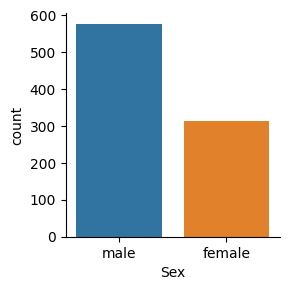

In [4]:
# Let's first check gender
sns.catplot(x='Sex',kind='count', height=3, aspect=1, data=titanic_df, hue='Sex')

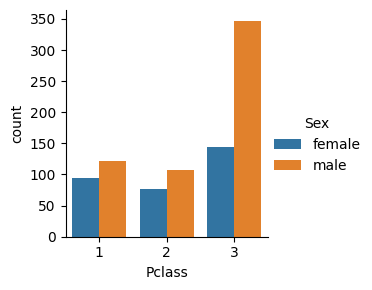

In [5]:
sns.catplot(x='Pclass', kind='count', height =3, aspect= 1, data=titanic_df,hue='Sex')

In [6]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [7]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


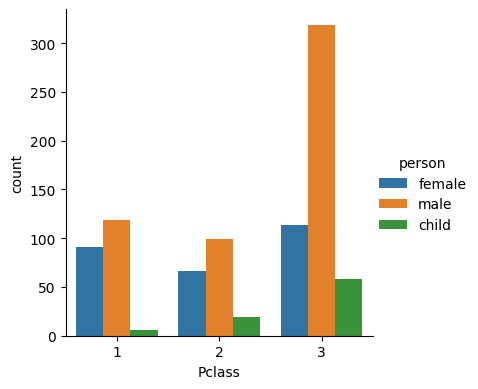

In [8]:
sns.catplot(x='Pclass', kind='count', height =4, aspect= 1, data=titanic_df,hue='person')

<Axes: >

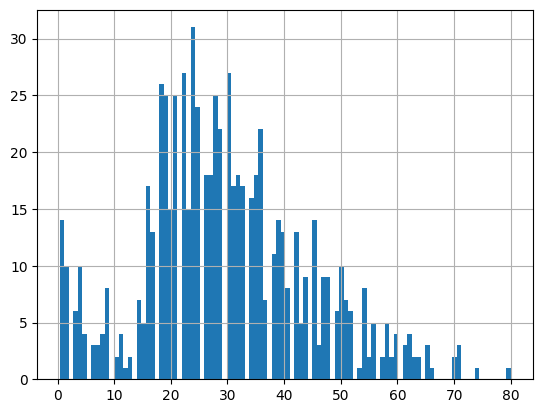

In [9]:
titanic_df['Age'].hist(bins=100)

In [10]:
titanic_df['person'].value_counts()

person
male      537
female    271
child      83
Name: count, dtype: int64

In [11]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

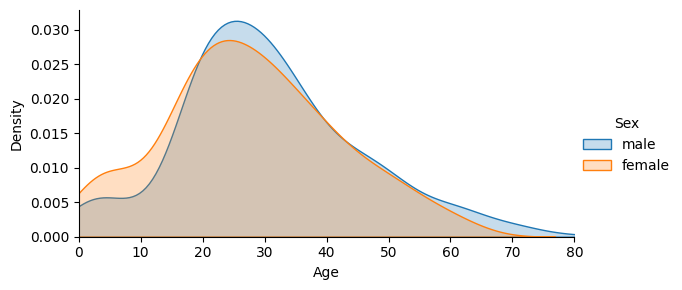

In [12]:
# use FacetGrid to plot multiple kdeplots on one plot

fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=2)

fig.map(sns.kdeplot,'Age',fill= True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

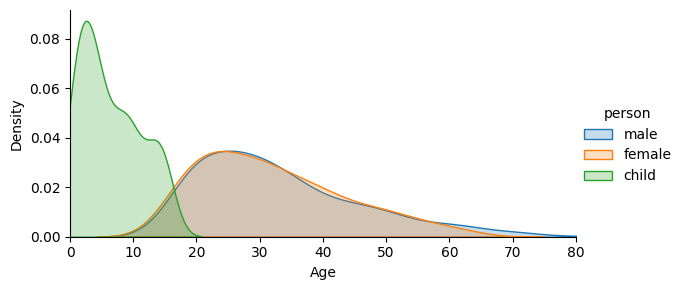

In [13]:
fig = sns.FacetGrid(titanic_df, hue="person",aspect=2)
fig.map(sns.kdeplot,'Age',fill= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

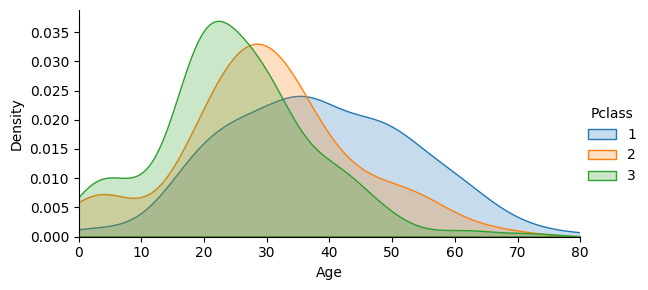

In [14]:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=2)
fig.map(sns.kdeplot,'Age', fill= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

**Q2.What deck were the passengers on and how does that relate to their class?**

In [15]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [16]:
deck = titanic_df['Cabin'].dropna()

In [17]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

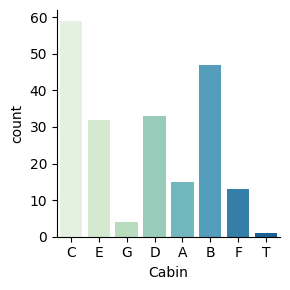

In [18]:
# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot(x='Cabin',kind = 'count', data=cabin_df, hue= 'Cabin', legend=False, palette='GnBu', aspect=1, height=3)

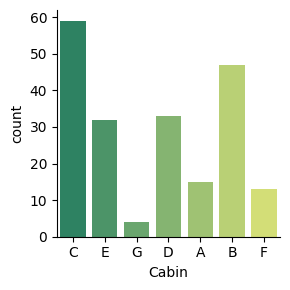

In [19]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot(x='Cabin',data=cabin_df,hue='Cabin', kind='count', palette='summer', aspect=1, height=3)

**Q3.Where did the passengers come from?**

In [20]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


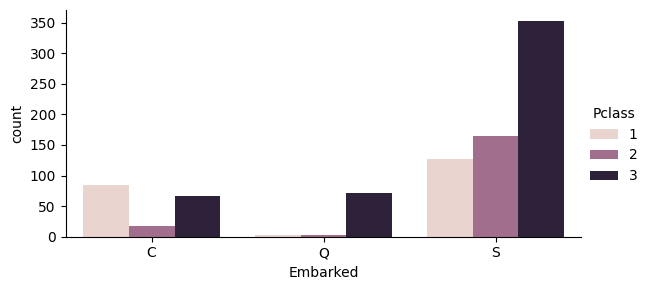

In [21]:
sns.catplot(x='Embarked',data=titanic_df,hue='Pclass', order=['C','Q','S'], kind='count', aspect=2, height=3)

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class.

**Q4. Who was alone and who was with family?**

In [22]:
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [23]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\HP\AppData\Local\Temp\ipykernel_2124\1683785825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
C:\Users\HP\AppData\Local\Temp\ipykernel_2124\1683785825.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'With Family' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'


In [24]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


C:\Users\HP\AppData\Local\Temp\ipykernel_2124\598691845.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Alone',data=titanic_df,palette='Blues', legend=False, kind='count', aspect=1, height=3)


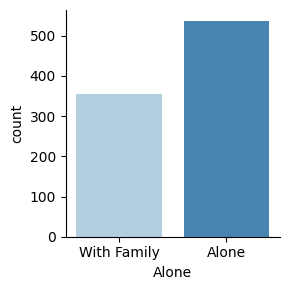

In [35]:
sns.catplot(x='Alone',data=titanic_df,palette='Blues', legend=False, kind='count', aspect=1, height=3)

**Q5. What factors helped someone survive the sinking or crash of the Titanic**

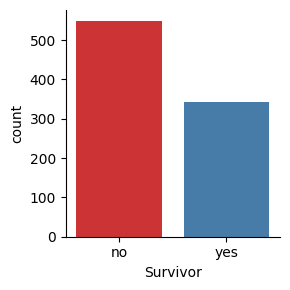

In [37]:
# Let's start by creating a new column for legibility purposes through mapping (Lec 36)
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 
sns.catplot(x='Survivor',data=titanic_df, hue='Survivor', legend = False, palette='Set1', kind='count',aspect=1, height=3)

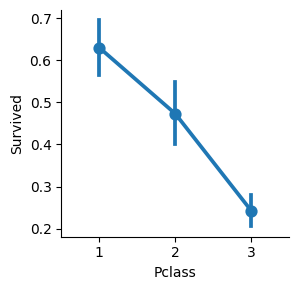

In [44]:
sns.catplot(x='Pclass',y='Survived',data=titanic_df, kind='point', aspect=1, height=3)

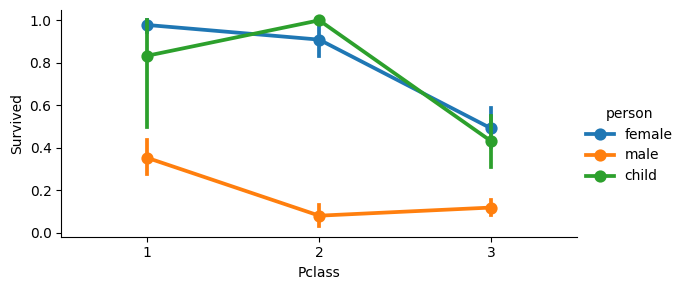

In [48]:
sns.catplot(x='Pclass',y='Survived',hue='person',data=titanic_df, kind='point', aspect=2, height=3)

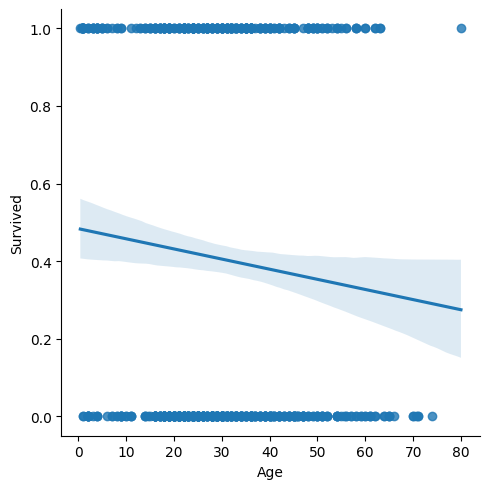

In [51]:
#linear plot on age versus survival to see whether younger or older have an effect on survival rate?
sns.lmplot(x='Age',y='Survived',data=titanic_df)  

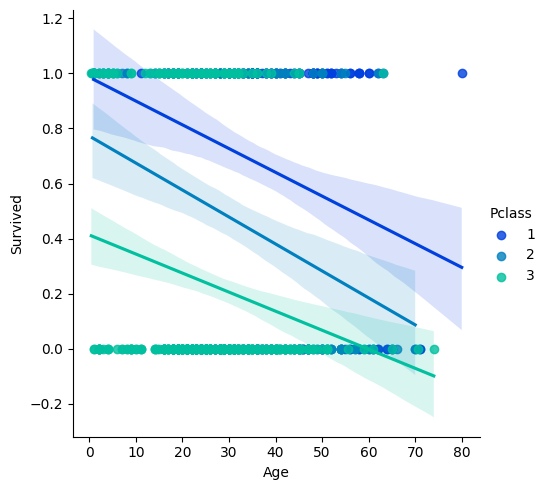

In [52]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter')

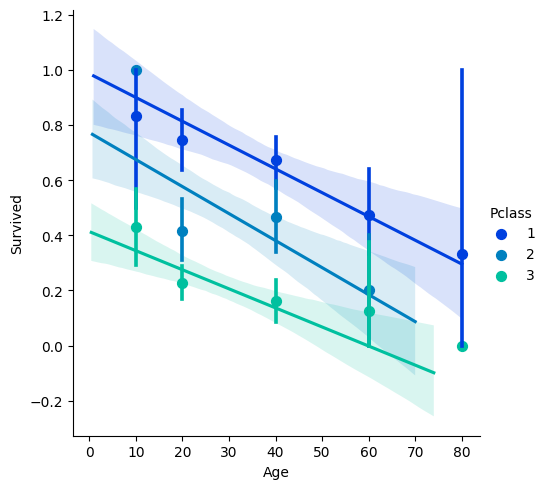

In [54]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

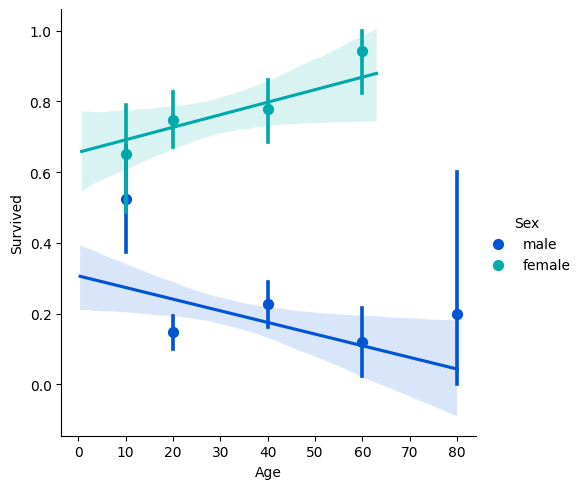

In [55]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)